Figures for the Protease Inhibitor Dataset

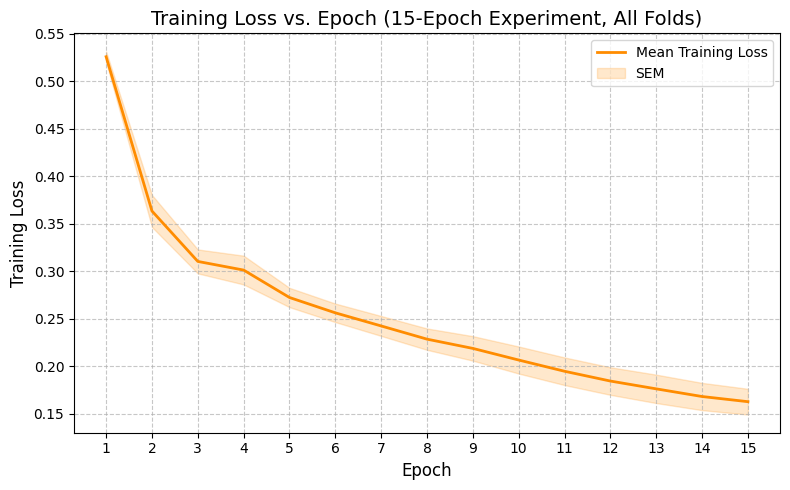

In [9]:
import re
import numpy as np
import matplotlib.pyplot as plt

def parse_all_folds_loss(filename):
    """
    Reads the specified file and extracts training loss values for each fold.
    Returns:
      folds_losses: a dictionary where keys are fold numbers (int) and values are lists of training loss values per epoch.
    """
    folds_losses = {}
    current_fold = None

    with open(filename, "r") as file:
        for line in file:
            # Detect start of a new fold section
            fold_match = re.search(r"Fold\s+(\d+)\s*/\s*5", line)
            if fold_match:
                current_fold = int(fold_match.group(1))
                folds_losses[current_fold] = []
                continue

            # If inside a fold section, look for epoch loss lines
            if current_fold is not None:
                epoch_match = re.search(r"Epoch\s+(\d+)\s+Loss:\s*([\d\.]+)", line)
                if epoch_match:
                    loss_val = float(epoch_match.group(2))
                    folds_losses[current_fold].append(loss_val)
                    continue

                # End of the fold section when metrics are encountered
                if "Exact Match Accuracy:" in line:
                    current_fold = None
    return folds_losses

def main():
    # File containing the 15-epoch experiment output
    filename = "fiteen_epoch_out.txt"
    
    # Parse the file to get training loss for each fold
    folds_losses = parse_all_folds_loss(filename)
    
    if not folds_losses:
        print("No fold loss data found in the file.")
        return
    
    # Verify that all folds have the same number of epochs
    num_epochs_per_fold = [len(losses) for losses in folds_losses.values()]
    if len(set(num_epochs_per_fold)) != 1:
        print("Inconsistent number of epochs across folds.")
        return

    num_epochs = num_epochs_per_fold[0]
    epochs = np.arange(1, num_epochs + 1)
    
    # Create a 2D numpy array of shape (num_folds, num_epochs)
    fold_losses_array = np.array([folds_losses[fold] for fold in sorted(folds_losses.keys())])
    
    # Compute the mean training loss and SEM (Standard Error of the Mean) across folds for each epoch
    mean_loss = np.mean(fold_losses_array, axis=0)
    std_loss = np.std(fold_losses_array, axis=0)
    n_folds = fold_losses_array.shape[0]
    sem_loss = std_loss / np.sqrt(n_folds)
    
    # Plot the mean training loss with a shaded area representing the SEM
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, mean_loss, linestyle='-', linewidth=2, color='darkorange', label="Mean Training Loss")
    plt.fill_between(epochs, mean_loss - sem_loss, mean_loss + sem_loss, color='darkorange', alpha=0.2, label="SEM")
    plt.xlabel("Epoch", fontsize=12)
    plt.xticks(epochs)
    plt.ylabel("Training Loss", fontsize=12)
    plt.title("Training Loss vs. Epoch (15-Epoch Experiment, All Folds)", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()